In [1]:
import pandas as pd
import numpy as np
import os
import sys
import json
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

# Data Import

In [2]:
features_df = pd.read_csv("data/Features_data_set.csv")
sales_df = pd.read_csv("data/sales_data_set.csv")
stores_df = pd.read_csv("data/stores_data_set.csv")

In [3]:
# convert date column to pandas datetime format
features_df["Date"] = pd.to_datetime(features_df["Date"], format="%d/%m/%Y")
sales_df["Date"] = pd.to_datetime(sales_df["Date"], format="%d/%m/%Y")

In [4]:
features_df.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [5]:
sales_df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


In [6]:
stores_df.head()

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


In [7]:
num_feature_samples, num_features = features_df.shape
num_sale_samples, num_sale_features = sales_df.shape
num_stores_samples, num_stores_features = stores_df.shape
print(f"The feature dataset contains {num_feature_samples} samples and each sample has {num_features} features.")
print(f"The sales dataset contains {num_sale_samples} samples and each sample has {num_sale_features} features.")
print(f"The store dataset contains {num_stores_samples} samples and each sample has {num_stores_features} features.")

The feature dataset contains 8190 samples and each sample has 12 features.
The sales dataset contains 421570 samples and each sample has 5 features.
The store dataset contains 45 samples and each sample has 3 features.


# Create Final Dataset

## Combine Data to one Dataframe

In [22]:
tmp_df = pd.merge(sales_df, features_df, on=["Store", "Date", "IsHoliday"], how="left")
data_df = pd.merge(stores_df, tmp_df, on=["Store"], how="left")

In [23]:
data_df.head()

,Store,Type,Size,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
0,1,A,151315,1,2010-02-05,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
1,1,A,151315,1,2010-02-12,46039.49,True,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106
2,1,A,151315,1,2010-02-19,41595.55,False,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106
3,1,A,151315,1,2010-02-26,19403.54,False,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106
4,1,A,151315,1,2010-03-05,21827.90,False,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106


In [24]:
num_samples, num_features = data_df.shape
print(f"The combined dataframe has {num_samples} samples and each sample has {num_features} features.")

The combined dataframe has 421570 samples and each sample has 16 features.


Check new dataframe for null values.

In [25]:
for col in data_df.columns:
    count_null = data_df[col].isnull().sum()
    print(f"The column {col} has {count_null} null values.")

The column Store has 0 null values.
The column Type has 0 null values.
The column Size has 0 null values.
The column Dept has 0 null values.
The column Date has 0 null values.
The column Weekly_Sales has 0 null values.
The column IsHoliday has 0 null values.
The column Temperature has 0 null values.
The column Fuel_Price has 0 null values.
The column MarkDown1 has 270889 null values.
The column MarkDown2 has 310322 null values.
The column MarkDown3 has 284479 null values.
The column MarkDown4 has 286603 null values.
The column MarkDown5 has 270138 null values.
The column CPI has 0 null values.
The column Unemployment has 0 null values.


## Convert Type Column to categorical
<br>
There are three types of stores available: A, B and C
<br>
Type A shall be converted to 0, Type B to 1 and Type C to 2

In [44]:
def convert_store_type(df):
    df_copy = df.copy()
    df_copy.loc[df_copy["Type"] == "A", "Type"] = 0
    df_copy.loc[df_copy["Type"] == "B", "Type"] = 1
    df_copy.loc[df_copy["Type"] == "C", "Type"] = 2
    df_copy["Type"] = df_copy["Type"].astype(int)
    return df_copy

In [45]:
data_df = convert_store_type(data_df)

In [46]:
data_df.head()

,Store,Type,Size,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Year,Month,Week_of_Year
0,1,0,151315,1,2010-02-05,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,2010,2,5
1,1,0,151315,1,2010-02-12,46039.49,True,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,2010,2,6
2,1,0,151315,1,2010-02-19,41595.55,False,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,2010,2,7
3,1,0,151315,1,2010-02-26,19403.54,False,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,2010,2,8
4,1,0,151315,1,2010-03-05,21827.90,False,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,2010,3,9


## Convert the Date Column to Seperate Features
Each date shall be converted to year and weekofyear categorical values.
Use WeekOfYear, because the final model should be able to predict the weekly sales for a given week.

In [47]:
data_df_copy = data_df
data_df_copy["Year"] = data_df_copy.Date.dt.year
data_df_copy["Week_of_Year"] = data_df_copy.Date.dt.weekofyear
# convert year, month and day to categorical values
data_df_converted = pd.get_dummies(data_df_copy, columns=["Year", "Week_of_Year"])

# remove column Date
data_df_converted.drop("Date", axis=1, inplace=True)

In [48]:
data_df_converted.head()

,Store,Type,Size,Dept,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,...,Week_of_Year_43,Week_of_Year_44,Week_of_Year_45,Week_of_Year_46,Week_of_Year_47,Week_of_Year_48,Week_of_Year_49,Week_of_Year_50,Week_of_Year_51,Week_of_Year_52
0,1,0,151315,1,24924.50,False,42.31,2.572,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
1,1,0,151315,1,46039.49,True,38.51,2.548,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
2,1,0,151315,1,41595.55,False,39.93,2.514,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
3,1,0,151315,1,19403.54,False,46.63,2.561,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
4,1,0,151315,1,21827.90,False,46.50,2.625,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0


In [49]:
data_df_converted.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 421570 entries, 0 to 421569
Data columns (total 71 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Store            421570 non-null  int64  
 1   Type             421570 non-null  int64  
 2   Size             421570 non-null  int64  
 3   Dept             421570 non-null  int64  
 4   Weekly_Sales     421570 non-null  float64
 5   IsHoliday        421570 non-null  bool   
 6   Temperature      421570 non-null  float64
 7   Fuel_Price       421570 non-null  float64
 8   MarkDown1        150681 non-null  float64
 9   MarkDown2        111248 non-null  float64
 10  MarkDown3        137091 non-null  float64
 11  MarkDown4        134967 non-null  float64
 12  MarkDown5        151432 non-null  float64
 13  CPI              421570 non-null  float64
 14  Unemployment     421570 non-null  float64
 15  Month            421570 non-null  int64  
 16  Year_2010        421570 non-null  uint

In [50]:
num_samples, num_features = data_df_converted.shape
print(f"The converted dataframe has {num_samples} samples and each sample has {num_features} features.")

The converted dataframe has 421570 samples and each sample has 71 features.


## Use the Ierative Imputer from Sklearn to Remove Missing Data
<br>
Cited from Scikit-Learn Documentation: <br><br>

> *IterativeImputer class, which models each feature with missing values as a function of other features, and uses that estimate for imputation. It does so in an iterated round-robin fashion: at each step, a feature column is designated as output y and the other feature columns are treated as inputs X. A regressor is fit on (X, y) for known y. Then, the regressor is used to predict the missing values of y. This is done for each feature in an iterative fashion, and then is repeated for max_iter imputation rounds. The results of the final imputation round are returned.*

In [53]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

imputer = IterativeImputer(max_iter=10, random_state=42, verbose=1)
data_df_imputed = imputer.fit_transform(data_df_converted[["MarkDown1","MarkDown2","MarkDown3","MarkDown4","MarkDown5"]])

[IterativeImputer] Completing matrix with shape (421570, 5)
[IterativeImputer] Change: 6390.376494974194, scaled tolerance: 141.63061 
[IterativeImputer] Change: 495.53567181432754, scaled tolerance: 141.63061 
[IterativeImputer] Change: 191.70435868022446, scaled tolerance: 141.63061 
[IterativeImputer] Change: 131.4546877325979, scaled tolerance: 141.63061 
[IterativeImputer] Early stopping criterion reached.


In [55]:
# add new MarkDown data to dataframe
data_df_converted["MarkDown1"] = data_df_imputed[:, 0]
data_df_converted["MarkDown2"] = data_df_imputed[:, 1]
data_df_converted["MarkDown3"] = data_df_imputed[:, 2]
data_df_converted["MarkDown4"] = data_df_imputed[:, 3]
data_df_converted["MarkDown5"] = data_df_imputed[:, 4]

In [56]:
data_df_converted.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 421570 entries, 0 to 421569
Data columns (total 71 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Store            421570 non-null  int64  
 1   Type             421570 non-null  int64  
 2   Size             421570 non-null  int64  
 3   Dept             421570 non-null  int64  
 4   Weekly_Sales     421570 non-null  float64
 5   IsHoliday        421570 non-null  bool   
 6   Temperature      421570 non-null  float64
 7   Fuel_Price       421570 non-null  float64
 8   MarkDown1        421570 non-null  float64
 9   MarkDown2        421570 non-null  float64
 10  MarkDown3        421570 non-null  float64
 11  MarkDown4        421570 non-null  float64
 12  MarkDown5        421570 non-null  float64
 13  CPI              421570 non-null  float64
 14  Unemployment     421570 non-null  float64
 15  Month            421570 non-null  int64  
 16  Year_2010        421570 non-null  uint

In [57]:
data_df_converted.describe()

,Store,Type,Size,Dept,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,...,Week_of_Year_43,Week_of_Year_44,Week_of_Year_45,Week_of_Year_46,Week_of_Year_47,Week_of_Year_48,Week_of_Year_49,Week_of_Year_50,Week_of_Year_51,Week_of_Year_52
count,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,...,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000
mean,22.200546,0.589912,136727.915739,44.260317,15981.258123,60.090059,3.361027,7243.167005,3344.781561,1508.063027,...,0.021005,0.013957,0.013979,0.013941,0.014135,0.014097,0.014133,0.014166,0.014192,0.014104
std,12.785297,0.666337,60980.583328,30.492054,22711.183519,18.447931,0.458515,4956.999370,4868.395048,5490.100021,...,0.143400,0.117314,0.117402,0.117245,0.118049,0.117892,0.118039,0.118175,0.118283,0.117922
min,1.000000,0.000000,34875.000000,1.000000,-4988.940000,-2.060000,2.472000,0.270000,-265.760000,-574.253933,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,11.000000,0.000000,93638.000000,18.000000,2079.650000,46.680000,2.933000,7243.167005,3308.193821,115.180000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,22.000000,0.000000,140167.000000,37.000000,7612.030000,62.090000,3.452000,7243.167005,3344.781561,1508.063027,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,33.000000,1.000000,202505.000000,74.000000,20205.852500,74.280000,3.738000,7243.167005,3344.781561,1508.063027,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,45.000000,2.000000,219622.000000,99.000000,693099.360000,100.140000,4.468000,88646.760000,104519.540000,141630.610000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Split Data into X and Y
X: Numpy array of features with shape (n_samples, n_features) <br>
Y: Numpy array of target with shape (n_samples,)

In [73]:
X = data_df_converted.drop("Weekly_Sales", axis=1, inplace=False).to_numpy()
features_list = list(data_df_converted.drop("Weekly_Sales", axis=1, inplace=False).columns)
Y = data_df_converted["Weekly_Sales"].to_numpy()

In [74]:
print(f"Shape of X: {X.shape}")
print(f"Shape of Y: {Y.shape}")
print(features_list)

Shape of X: (421570, 70)
Shape of Y: (421570,)
['Store', 'Type', 'Size', 'Dept', 'IsHoliday', 'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment', 'Month', 'Year_2010', 'Year_2011', 'Year_2012', 'Week_of_Year_1', 'Week_of_Year_2', 'Week_of_Year_3', 'Week_of_Year_4', 'Week_of_Year_5', 'Week_of_Year_6', 'Week_of_Year_7', 'Week_of_Year_8', 'Week_of_Year_9', 'Week_of_Year_10', 'Week_of_Year_11', 'Week_of_Year_12', 'Week_of_Year_13', 'Week_of_Year_14', 'Week_of_Year_15', 'Week_of_Year_16', 'Week_of_Year_17', 'Week_of_Year_18', 'Week_of_Year_19', 'Week_of_Year_20', 'Week_of_Year_21', 'Week_of_Year_22', 'Week_of_Year_23', 'Week_of_Year_24', 'Week_of_Year_25', 'Week_of_Year_26', 'Week_of_Year_27', 'Week_of_Year_28', 'Week_of_Year_29', 'Week_of_Year_30', 'Week_of_Year_31', 'Week_of_Year_32', 'Week_of_Year_33', 'Week_of_Year_34', 'Week_of_Year_35', 'Week_of_Year_36', 'Week_of_Year_37', 'Week_of_Year_38', 'Week_of_Year_39', 'Week_of_

## Check Features for Importance on Target

In [66]:
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

# split into train and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

In [67]:
# feature selection
def select_features(X_train, y_train, X_test):
    # configure to select all features
    fs = SelectKBest(score_func=f_regression, k='all')
    # learn relationship from training data
    fs.fit(X_train, y_train)
    # transform train input data
    X_train_fs = fs.transform(X_train)
    # transform test input data
    X_test_fs = fs.transform(X_test)
    return X_train_fs, X_test_fs, fs

In [75]:
# feature selection
X_train_fs, X_test_fs, fs = select_features(X_train, Y_train, X_test)

# what are scores for the features
for i in range(len(fs.scores_)):
    print(f'Feature {features_list[i]}: {fs.scores_[i]}')

Feature Store: 2123.3028746355003
Feature Type: 10130.747688590931
Feature Size: 18635.333306216555
Feature Dept: 6670.453120019541
Feature IsHoliday: 42.14904077138193
Feature Temperature: 0.3374804699687895
Feature Fuel_Price: 1.4975001179559957
Feature MarkDown1: 874.9159996534064
Feature MarkDown2: 45.04875796932936
Feature MarkDown3: 292.5686275510059
Feature MarkDown4: 505.84589776502685
Feature MarkDown5: 904.992868487137
Feature CPI: 141.2950961172377
Feature Unemployment: 194.9150812255889
Feature Month: 241.8994905778302
Feature Year_2010: 18.677910157526153
Feature Year_2011: 0.5303213793217796
Feature Year_2012: 13.55005889317208
Feature Week_of_Year_1: 11.275424901604795
Feature Week_of_Year_2: 30.361813274200728
Feature Week_of_Year_3: 45.80320910545921
Feature Week_of_Year_4: 54.38985514575398
Feature Week_of_Year_5: 0.09614980180939109
Feature Week_of_Year_6: 3.2997399039159725
Feature Week_of_Year_7: 2.9826345551231688
Feature Week_of_Year_8: 5.96920371883476
Feature W

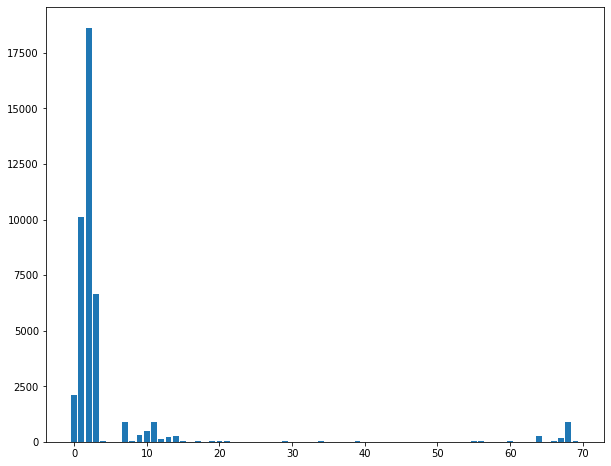

In [76]:
# plot the scores
plt.bar([i for i in range(len(fs.scores_))], fs.scores_)
plt.show()

# Store Data in CSV Files for Training and Testing

In [77]:
def store_to_csv(X, Y, filename, path):
    '''
    This function takes to arrays (X and Y) as input and stores them as csv files.
    
    Args:
        X (np.ndarray): Sample data of shape (n_samples, n_features)
        Y (np.ndarray): Target data of shape (n_samples,)
        filename (string): The filename for the new csv file
        path (string): The path to the folder where the new csv file should be stored in
    '''
    if not os.path.exists(path):
        os.makedirs(path)
    
    X_df = pd.DataFrame(X)
    Y_df = pd.DataFrame(Y)
    pd.concat([Y_df, X_df], axis=1).to_csv(os.path.join(path, filename), header=False, index=False)
    
    print(f"The file {os.path.join(path, filename)} was created.")

In [78]:
# split into train and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

store_to_csv(X_train, Y_train, "train.csv", "data_converted")
store_to_csv(X_test, Y_test, "test.csv", "data_converted")

The file data_converted/train.csv was created.
The file data_converted/test.csv was created.


In [80]:
import csv
# store feature list as file for later usage
features_list_csv_filepath = "data_converted/features_list.csv"

with open(features_list_csv_filepath, "w+") as csv_file:
    csv_writer = csv.writer(csv_file)
    csv_writer.writerow(features_list)